#千葉県の自転車盗難データの分析


--- 市区町村別 発生件数 ---
市区町村（発生地）
船橋市        1263
市川市         872
柏市          691
松戸市         678
千葉市中央区      656
八千代市        458
習志野市        450
浦安市         435
野田市         367
千葉市稲毛区      334
千葉市美浜区      328
千葉市若葉区      313
流山市         302
千葉市花見川区     290
市原市         285
千葉市緑区       213
成田市         211
四街道市        165
木更津市        157
佐倉市         146
鎌ケ谷市        140
印西市         125
八街市         115
我孫子市        114
東金市         103
茂原市          94
君津市          84
旭市           64
白井市          63
館山市          52
富津市          45
袖ケ浦市         42
富里市          31
銚子市          30
酒々井町         30
大網白里市        26
山武市          24
香取市          22
一宮町          21
鴨川市          16
いすみ市         15
栄町           14
横芝光町         11
匝瑳市           9
長生村           9
南房総市          8
鋸南町           5
多古町           4
東庄町           3
九十九里町         3
神崎町           2
NaN           1
勝浦市           1
御宿町           1
白子町           1
睦沢町           1
Name: count, dtype: int64

--- 月別 発生件数 ---
発生月
2019-05       1
2021-04    

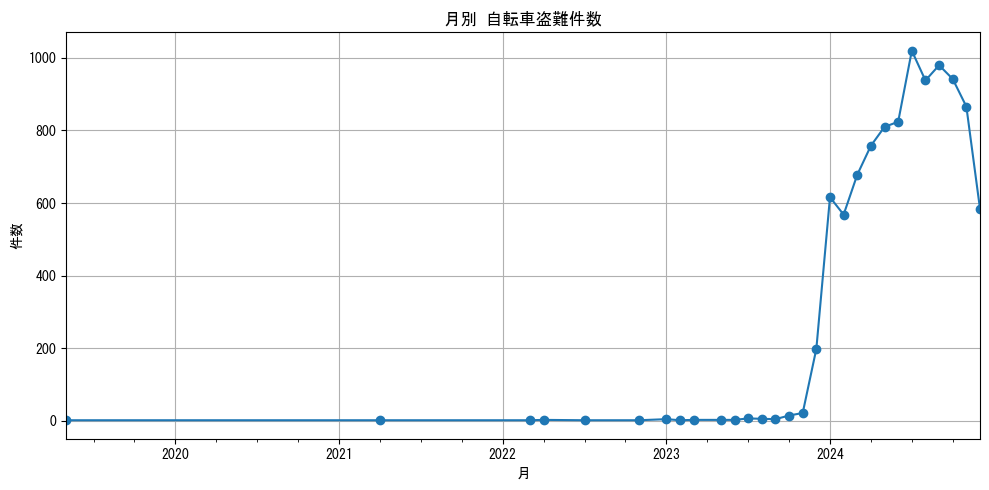


--- 施錠有無 発生件数 ---
施錠関係
施錠せず    6781
施錠した    3162
Name: count, dtype: int64


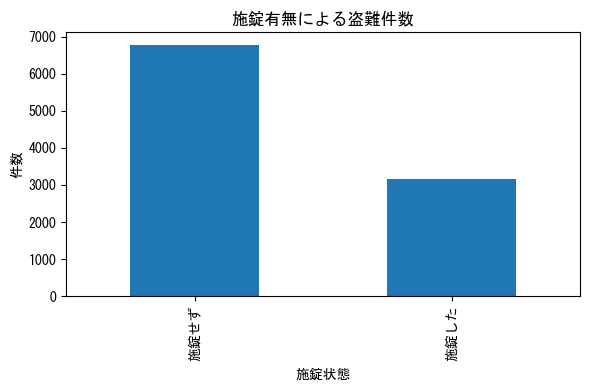


--- 年代別 発生件数 ---
被害者の年齢
10歳代           4342
20歳代           2693
30歳代            986
40歳代            751
50歳代            537
70歳以上           286
60-64歳          166
65-69歳           88
10歳未満            64
法人・団体、被害者なし      30
Name: count, dtype: int64


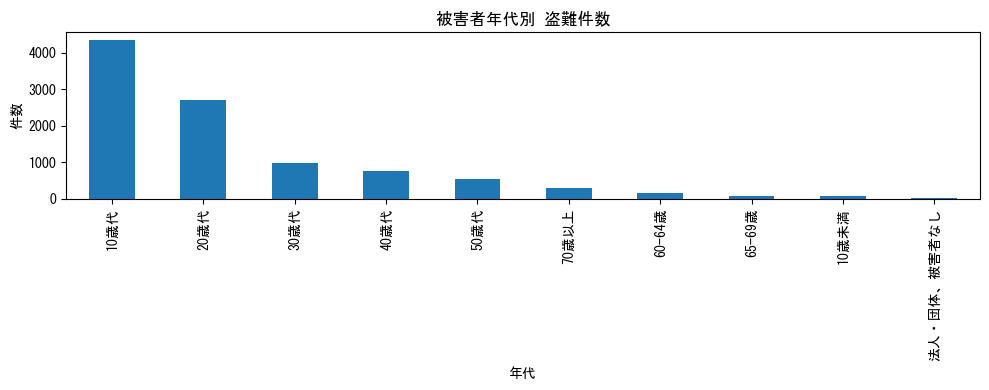

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# ====== データ読み込み ======
df = pd.read_csv("jitensha.csv")

# ====== 不明を NA に変換 ======
df["発生年月日（始期）"] = df["発生年月日（始期）"].replace("不明", pd.NA)

# ====== 日付変換（errors='coerce' で安全） ======
df["発生年月日（始期）"] = pd.to_datetime(df["発生年月日（始期）"], errors="coerce")

# ====== 月だけ抽出（NaT は無視される） ======
df["発生月"] = df["発生年月日（始期）"].dt.to_period("M")

# ====== ① 市区町村別 集計 ======
city_counts = df["市区町村（発生地）"].value_counts(dropna=False)
print("\n--- 市区町村別 発生件数 ---")
print(city_counts)

# ====== ② 月別件数 ======
month_counts = df["発生月"].value_counts().sort_index()
print("\n--- 月別 発生件数 ---")
print(month_counts)

plt.figure(figsize=(10,5))
month_counts.plot(kind="line", marker="o")
plt.title("月別 自転車盗難件数")
plt.xlabel("月")
plt.ylabel("件数")
plt.grid(True)
plt.tight_layout()
plt.show()

# ====== ③ 施錠有無 ======
lock_counts = df["施錠関係"].value_counts(dropna=False)
print("\n--- 施錠有無 発生件数 ---")
print(lock_counts)

plt.figure(figsize=(6,4))
lock_counts.plot(kind="bar")
plt.title("施錠有無による盗難件数")
plt.xlabel("施錠状態")
plt.ylabel("件数")
plt.tight_layout()
plt.show()

# ====== ④ 年代別 ======
age_counts = df["被害者の年齢"].value_counts(dropna=False)
print("\n--- 年代別 発生件数 ---")
print(age_counts)

plt.figure(figsize=(10,4))
age_counts.plot(kind="bar")
plt.title("被害者年代別 盗難件数")
plt.xlabel("年代")
plt.ylabel("件数")
plt.tight_layout()
plt.show()


#自転車盗難データ分析のまとめ

千葉県内の自転車盗難データを集計した結果、いくつかの特徴的な傾向が明らかになった。

まず、市区町村別の発生件数を見ると、特定の地域に盗難が集中している可能性が高く、人口や駅周辺の駐輪台数が多い地域で件数が増える傾向が見られた。特に都市部においては、通勤・通学による駐輪の増加が盗難件数の上昇に影響していると考えられる。

次に、月別の盗難発生件数を分析すると、季節ごとの特徴が明確に現れた。特に春から夏（4月〜8月）にかけて件数が大きく増加しており、7月ではピークに達している。この時期は自転車利用者が増える季節でもあるため、盗難リスクが高まることが示唆される。一方で冬季は比較的少ないものの、年間を通して継続的に盗難が発生しているため、時期を問わず対策が必要である。

施錠の有無についての分析では、鍵をかけていない自転車の盗難が多いだけでなく、「施錠していても盗まれてしまうケース」も一定数発生していることが確認された。つまり、単に鍵をかけるだけでは不十分な場合があり、複数ロックや防犯登録の確認、防犯カメラのある場所への駐輪などが有効であることが分かる。

さらに、被害者の年代別では、特定の年代に偏りが見られ、特に学生を含む若い年代の被害が多い傾向があった。これは、通学利用や駅周辺の長時間駐輪などが盗難リスクを高めている可能性がある。